## Analysis for Draft 2 (Desikan)

In [8]:
# Load packages
pacman::p_load(tidyverse, ggpubr, ggthemes, ggsignif, patchwork)

# Working directory
setwd("/mnt/z/Vault/Coursework/CS-T680/AutismCNN")

# Paths & settings
PATH = list(
    demo = 'data/CHARM/demographics.tsv',
    desikan = 'data/CHARM/Desikan_sift2',
    features = 'data/statistics-desikan/features',
    figs = 'figures',
    results = 'data/analysis'
)

In [9]:
# Load global measures
df <- read_tsv(str_c(PATH$results, '/global_measures.txt'))

Rows: 313 Columns: 44
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): Subject, Sex, DX
dbl (41): Age, ADOS, SCQ, IQ, assortativity, characteristic_path_length, clu...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [143]:
stats = df %>%
    pivot_longer(-(1:7), names_to='measure', values_to='value') %>%
    group_by(measure) %>%
    rstatix::t_test(value ~ DX, var.equal=F)

effects = df %>%
    pivot_longer(-(1:7), names_to='measure', values_to='value') %>%
    group_by(measure) %>%
    rstatix::cohens_d(value ~ DX, var.equal=F)

group_diff = inner_join(stats, effects, by=c('measure', '.y.', 'group1', 'group2', 'n1', 'n2')) %>%
    arrange(p)

In [142]:
x <- group_diff %>%
    select(measure, p, effsize) %>%
    setNames(c("Measure", "p", "Cohens_d")) %>%
    drop_na() %>%
    knitr::kable('latex', booktabs=TRUE)

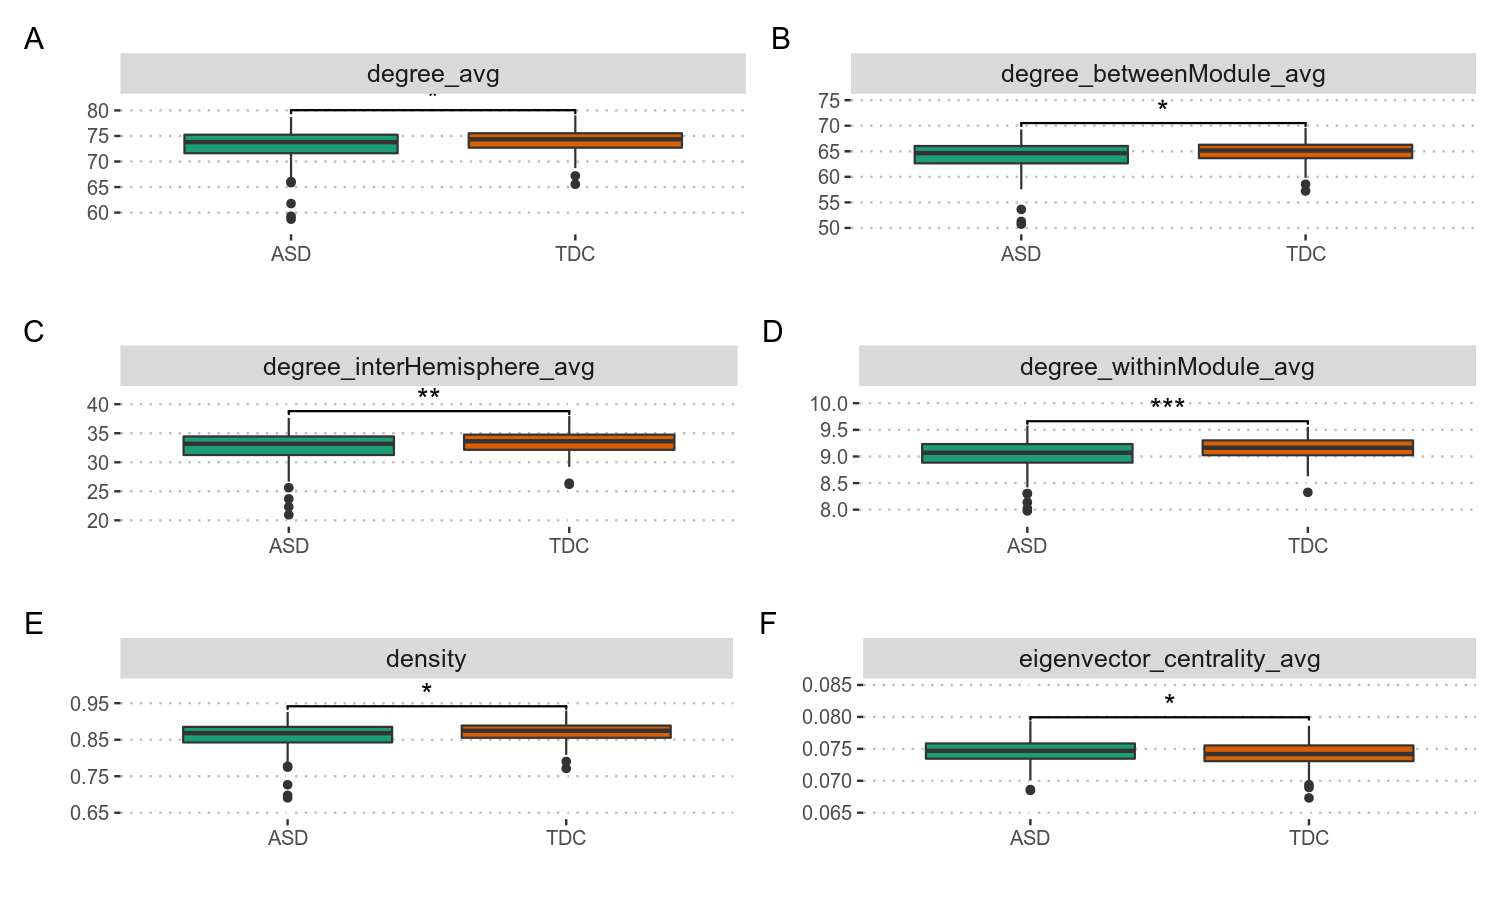

In [130]:
options(repr.plot.width=10, repr.plot.height=6, repr.plot.res=150)

scales = list(
    `degree_avg` = scale_y_continuous(limits=c(57,82), breaks=seq(55,80,5)),
    `degree_betweenModule_avg` = scale_y_continuous(limits=c(50,75), breaks=seq(50,75,5)),
    `degree_interHemisphere_avg` = scale_y_continuous(limits=c(20,42), breaks=seq(20,42,5)),
    `degree_withinModule_avg` = scale_y_continuous(limits=c(7.8,10.2), breaks=seq(8,10,.5)),
    `density` = scale_y_continuous(limits=c(0.65,1), breaks=seq(.65,1,.1)),
    `eigenvector_centrality_avg` = scale_y_continuous(limits=c(.065,.085), breaks=seq(.065,.085,.005))
)

p <- lapply(group_diff$measure, function(x) {
    df %>%
        pivot_longer(-(1:7), names_to='measure', values_to='value')  %>%
        filter(measure == x) %>%
        ggplot(aes(DX, value, fill=DX)) +
            geom_boxplot() +
            geom_signif(comparisons=list(c('ASD', 'TDC')), test='t.test',
                        map_signif_level=TRUE, textsize=5) +
            scale_fill_brewer(palette='Dark2') +
            facet_grid(.~measure) +
            theme_pubclean() +
            labs(x='', y='') +
            scales[x] +
            theme(
                legend.position='none',
                strip.text=element_text(size=12),

            )
})

# q <- (p[[1]] | p[[2]] | p[[3]]) / (p[[4]] | p[[5]] | p[[6]]) + plot_annotation(tag_levels='A')
q <- (p[[1]] | p[[2]]) / (p[[3]] | p[[4]]) / (p[[5]] | p[[6]]) + plot_annotation(tag_levels='A')
q
# ggsave(str_c(PATH$figs, '/group-diff_global-measures_boxplot.png'), width=8, height=10, dpi=300)

In [166]:
df %>%
    pivot_longer(-(1:7), names_to='measure', values_to='value') %>%
    group_by(measure) %>%
    filter(DX == 'ASD') %>%
    rstatix::cor_test(value, IQ) %>%
    drop_na() %>%
    filter(p <= 0.05, cor > 0.2)

measure,var1,var2,cor,statistic,p,conf.low,conf.high,method
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
degree_interHemisphere_avg,value,IQ,0.21,2.682294,0.00809,0.05548842,0.3534588,Pearson
degree_withinModule_avg,value,IQ,0.23,2.948139,0.00369,0.07609840,0.3714389,Pearson


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 4 rows containing missing values (geom_point).”


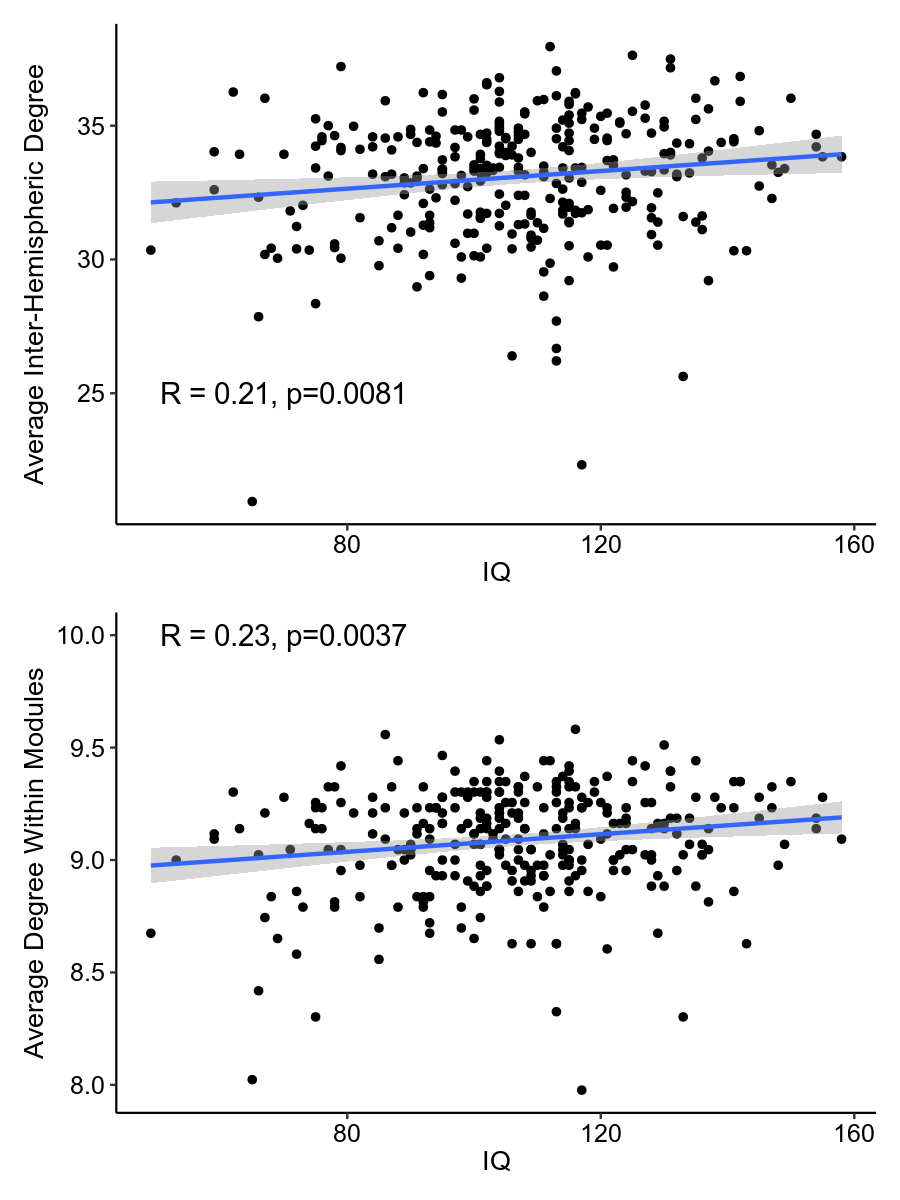

In [191]:
options(repr.plot.width=6, repr.plot.height=8, repr.plot.res=150)

p <- df %>%
    pivot_longer(-(1:7), names_to='measure', values_to='value') %>%
    filter(measure == 'degree_interHemisphere_avg') %>%
    ggplot(aes(IQ, value)) +
        geom_point() +
        geom_smooth(method='lm') + 
        annotate('text', x=70, y=25, label='R = 0.21, p=0.0081', size=5) +
        labs(x='IQ', y='Average Inter-Hemispheric Degree') + 
        theme_pubr() +
        theme(
            axis.text=element_text(size=12),
            axis.title=element_text(size=13),
        )

q <- df %>%
    pivot_longer(-(1:7), names_to='measure', values_to='value') %>%
    filter(measure == 'degree_withinModule_avg') %>%
    ggplot(aes(IQ, value)) +
        geom_point() +
        geom_smooth(method='lm') + 
        annotate('text', x=70, y=10, label='R = 0.23, p=0.0037', size=5) +
        labs(x='IQ', y='Average Degree Within Modules') + 
        theme_pubr() +
        theme(
            axis.text=element_text(size=12),
            axis.title=element_text(size=13),
        )

p / q
ggsave(str_c(PATH$figs, '/corrplot_global-measures_boxplot.png'), width=6, height=8, dpi=300)